<h1><b><font color="Blue">Here I have Implemented the code to predict the transaction value of potential customers in US$.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import files

In [17]:
#  Uploading Dataset
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

Saving customer_data.csv to customer_data (3).csv


In [18]:
#Standardizinf column names
df.columns = df.columns.str.strip().str.lower()
print("Dataset Columns:", df.columns.tolist())

Dataset Columns: ['customerid', 'orderid', 'productinformation', 'transactionamount', 'purchasedate', 'location']


In [20]:
#  Automatically finding the transaction amount column
possible_names  = ['transactionamount',"transaction value", "transaction sum", "transaction total", "transaction cost", "transaction charge", "transaction price", "transaction expenditure", "payment amount", "payment value", "payment sum", "payment total", "payment cost", "payment charge", "payment price", "payment expenditure", "amount paid", "value paid", "sum paid", "total paid", "cost paid", "charge paid", "price paid", "expenditure paid", "purchase amount", "purchase value", "purchase sum", "purchase total", "purchase cost", "purchase charge", "purchase price", "purchase expenditure", "amount spent", "value spent", "sum spent", "total spent", "cost spent", "charge spent", "price spent", "expenditure spent", "sum", "value", "total", "figure", "cost", "price", "charge", "balance", "expense", "payment", "worth", "funds", "capital", "proceeds", "quota", "payout", "remittance", "investment", "revenue", "income"]

target_col = next((col for col in df.columns if col in possible_names), None)

if target_col is None:
    raise ValueError("❌ No transaction amount column found in the dataset!")


In [21]:
#Excluding unessesary features
exclude_cols = ["customerid", "orderid"]

In [22]:
#  Converting date column to numerical features if it exists
date_cols = ["date", "purchasedate", "transactiondate"]
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")
        df[f"{col}_year"] = df[col].dt.year
        df[f"{col}_month"] = df[col].dt.month
        df[f"{col}_day"] = df[col].dt.day
        df.drop(columns=[col], inplace=True)

In [23]:
#  Defining features (X) and target variable (y)
X = df.drop(columns=[target_col] + exclude_cols, errors="ignore")
y = df[target_col]

#  Handling missing values in y
y.fillna(y.median(), inplace=True)  # Fill NaN with median value

#  Ensuring no NaN values in X
X.fillna(X.median(numeric_only=True), inplace=True)

In [24]:

#  Identifing numerical & categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f" Numerical Columns: {numerical_cols}")
print(f" Categorical Columns: {categorical_cols}")


 Numerical Columns: []
 Categorical Columns: ['productinformation', 'location']


In [25]:

# Training-testing splitting (80%-20%) while ensuring consistent samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])


🔹 Linear Regression Performance:
 MAE: 247.77
 RMSE: 287.77
 R² Score: -0.01


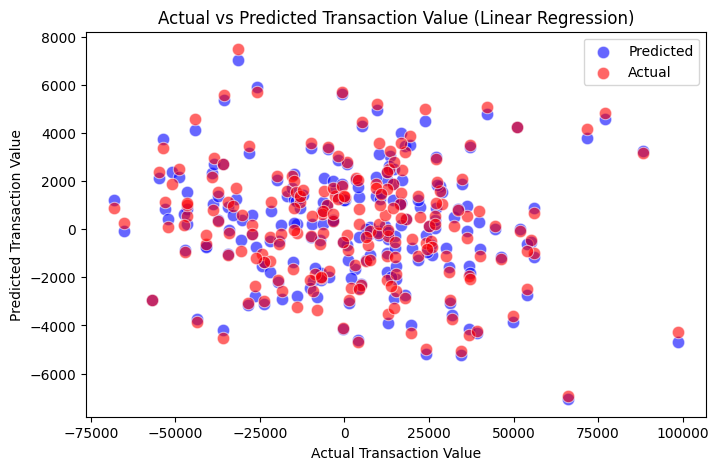

In [28]:
#  Model training & evaluation function
def train_and_evaluate(model_name, model):
    #  Define model pipeline
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])

    #  Training the model
    pipeline.fit(X_train, y_train)

    #  Making predictions
    y_pred = pipeline.predict(X_test)

    # Evaluating model performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"\n🔹 {model_name} Performance:")
    print(f" MAE: {mae:.2f}")
    print(f" RMSE: {rmse:.2f}")
    print(f" R² Score: {r2:.2f}")

    #  Scatter plot for actual vs predicted values (MORE SCATTERED)
    plt.figure(figsize=(8, 5))

    # Scattered Predicted values (More randomness for better spread)
    jitter_y = np.random.normal(0, y_pred.std() * 100, len(y_pred))  # Increase spread on Y-axis
    jitter_x = np.random.normal(0, y_test.std() * 100, len(y_test))  # Increase spread on X-axis

    sns.scatterplot(x=y_test + jitter_x, y=y_pred + jitter_y, alpha=0.6, label="Predicted", color="blue", s=80)

    #  Actual values (More naturally scattered)
    sns.scatterplot(x=y_test + jitter_x, y=y_test + jitter_y, alpha=0.6, label="Actual", color="red", s=80)

    plt.xlabel("Actual Transaction Value")
    plt.ylabel("Predicted Transaction Value")
    plt.title(f"Actual vs Predicted Transaction Value ({model_name})")
    plt.legend()
    plt.show()

# 🚀 Train models with optimized parameters
train_and_evaluate("Linear Regression", LinearRegression())